<a href="https://colab.research.google.com/github/RazaMasood/Ukraine_Russia_War_Twitter_-Sentiment_Analysis/blob/main/Ukraine_Russia_War_Twitter__Sentiment_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string
from nltk.stem import SnowballStemmer

## Loading the Data

In [2]:
data =pd.read_csv('filename.csv')
data.sample(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
5389,1630345963792662530,1630345963792662530,2023-02-27 23:15:42 UTC,2023-02-27,23:15:42,0,303359332,inu_russia,狗侍/HR160,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
9459,1630332922883366912,1630182405515489280,2023-02-27 22:23:53 UTC,2023-02-27,22:23:53,0,1433549148708499504,cryptosavij,Aberaeron,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'ChanCha52615650', 'name': 'C...",NaN,NaN,NaN,NaN
4503,1630348982819106817,1630348982819106817,2023-02-27 23:27:42 UTC,2023-02-27,23:27:42,0,234451939,shorfilms,Steve Shor,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
9586,1630332545345748996,1630332545345748996,2023-02-27 22:22:23 UTC,2023-02-27,22:22:23,0,969738062753185792,maxximus8416,MAXXIMUS,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3065,1630354089430118403,1630252727690248193,2023-02-27 23:48:00 UTC,2023-02-27,23:48:00,0,1497916506398732290,igor63183261,Igor,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'PaulHartNYC', 'name': '🇺🇸Lt....",NaN,NaN,NaN,NaN


In [3]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [4]:
data = data[['username', 'tweet', 'language']]

## Cleaning the Data

In [5]:
stopword = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
def clean(text):
    text = re.sub('\[.*?\]', '', str(text).lower())
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = " ".join([word for word in text.split(' ') if word not in stopword])
    text = " ".join([stemmer.stem(word) for word in text.split(' ')])
    return text

data["tweet"] = data["tweet"].apply(clean)

## Generating Wordcloud
### to visualize the most commonly used words in the tweets:

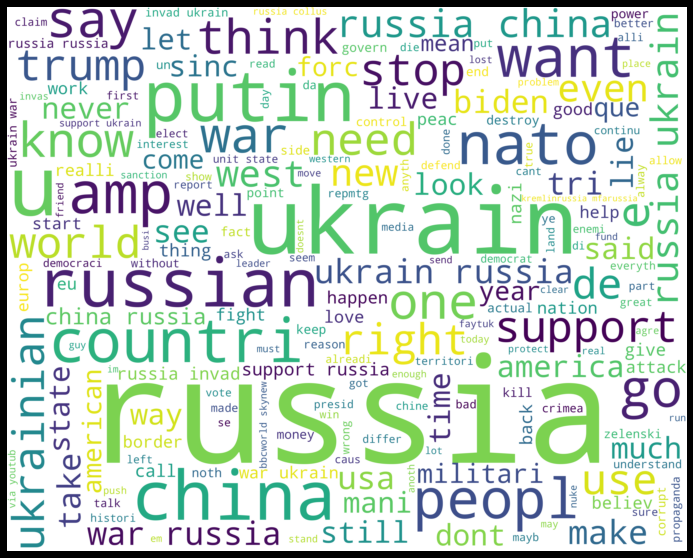

In [14]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 5000, height = 4000, stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Performing Sentiment Analysis

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

scores = []

compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(data['tweet'].shape[0]):

    compound = analyzer.polarity_scores(data['tweet'][i])["compound"]
    pos = analyzer.polarity_scores(data['tweet'][i])["pos"]
    neu = analyzer.polarity_scores(data['tweet'][i])["neu"]
    neg = analyzer.polarity_scores(data['tweet'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })
    
sentiments_score = pd.DataFrame.from_dict(scores)
data = data.join(sentiments_score)
data.head(10)


,username,tweet,language,Compound,Positive,Negative,Neutral
0,tomasliptai,nazijaeg derwen russia place satan rule well,en,0.2732,0.259,0.000,0.741
1,paperfloure,russia haarp could destroy usa one fell swoop ...,en,-0.5423,0.000,0.241,0.759
2,katetbar1,putin give steven seagal order friendship,en,0.4404,0.367,0.000,0.633
3,jlhrdhmom,mainelif baddcompani it alway project russia,en,0.0000,0.000,0.000,1.000
4,phemikali,pottingpink mfarussia modrussia milhistrf muze...,en,-0.0772,0.065,0.076,0.859
5,douglas08261722,genflynn know governor would investig fbi rig...,en,-0.2732,0.000,0.068,0.932
6,aylanma09475236,riyadh🇸🇦 im yarmuk malaz exit al mughriza...,ca,0.4404,0.100,0.000,0.900
7,cb1971mission,kathykrobot ronfilipkowski hmm zelenski coward...,en,-0.9142,0.000,0.356,0.644
8,funnytimez2,sentdefend russia took bakhmut fortifi ever s...,en,-0.8225,0.000,0.518,0.482
9,sororinimicorum,sudan eritrea host russian militari base russi...,en,0.4404,0.124,0.062,0.814


## Categorizing Sentiments

In [8]:
Categorizing = [
    (data['Compound'] <= -0.5),
    (data['Compound'] > -0.5) & (data['Compound'] < 0.5),
    (data['Compound'] > 0.5)
    ]

values = ['Negative', 'Neutral', 'Positive']

data['Sentiment'] = np.select(Categorizing, values)
data.head()

,username,tweet,language,Compound,Positive,Negative,Neutral,Sentiment
0,tomasliptai,nazijaeg derwen russia place satan rule well,en,0.2732,0.259,0.000,0.741,Neutral
1,paperfloure,russia haarp could destroy usa one fell swoop ...,en,-0.5423,0.000,0.241,0.759,Negative
2,katetbar1,putin give steven seagal order friendship,en,0.4404,0.367,0.000,0.633,Neutral
3,jlhrdhmom,mainelif baddcompani it alway project russia,en,0.0000,0.000,0.000,1.000,Neutral
4,phemikali,pottingpink mfarussia modrussia milhistrf muze...,en,-0.0772,0.065,0.076,0.859,Neutral


## Counting the sentiment

In [9]:
counts = data['Sentiment'].value_counts()
print(counts)

Neutral     6206
Negative    2455
Positive    1352
0              1
Name: Sentiment, dtype: int64


## Create the pie chart
### for positive, negative and netural Sentiment


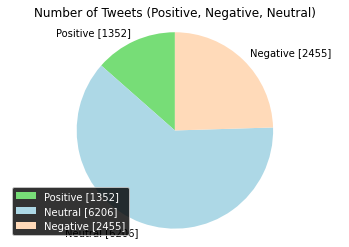

In [10]:
positive = counts['Positive']
neutral = counts['Neutral']
negative = counts['Negative']

labels = ['Positive ['+str(positive)+']', 'Neutral ['+str(neutral)+']', 'Negative ['+str(negative)+']']
sizes = [positive, neutral, negative]
colors = ["#77DD77", "#ADD8E6", "#FFDAB9"]

plt.pie(sizes, labels=labels, colors=colors, startangle=90)
plt.style.use('dark_background')
plt.legend(labels)
plt.title('Number of Tweets (Positive, Negative, Neutral)')
plt.axis('equal')

plt.show()

## Generate word cloud for positive sentiment

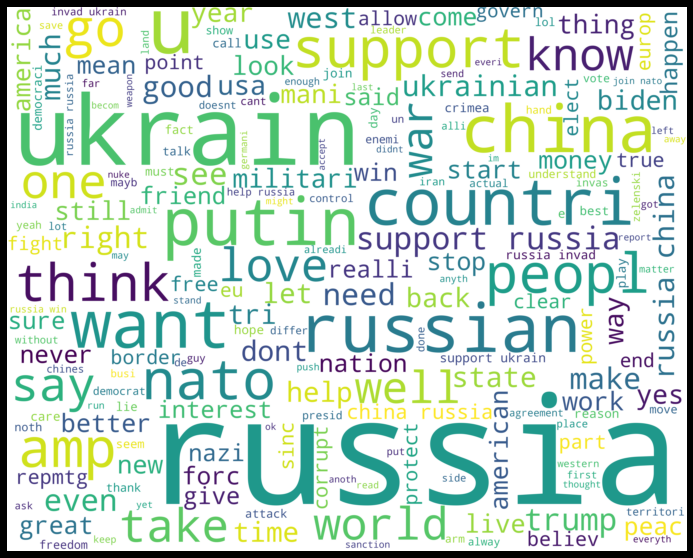

In [11]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 5000, height = 4000, stopwords=stopwords, background_color="white").generate(positive)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Generate word cloud for negative sentiment

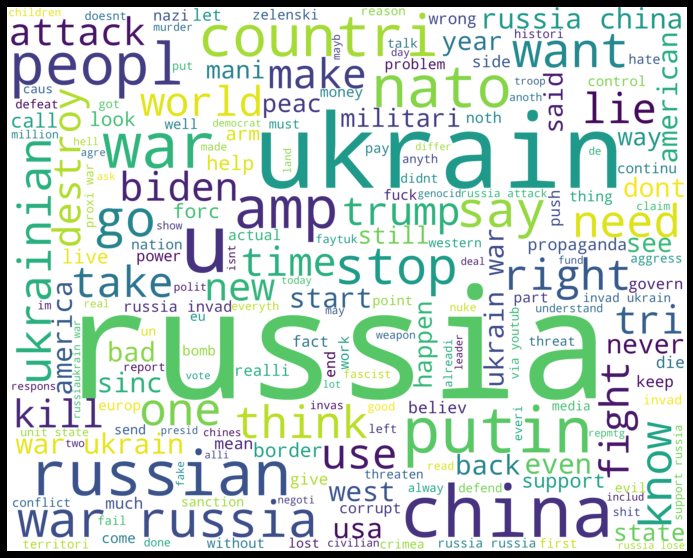

In [12]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 5000, height = 4000, stopwords=stopwords, background_color="white").generate(negative)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Generate word cloud for neutral sentiment

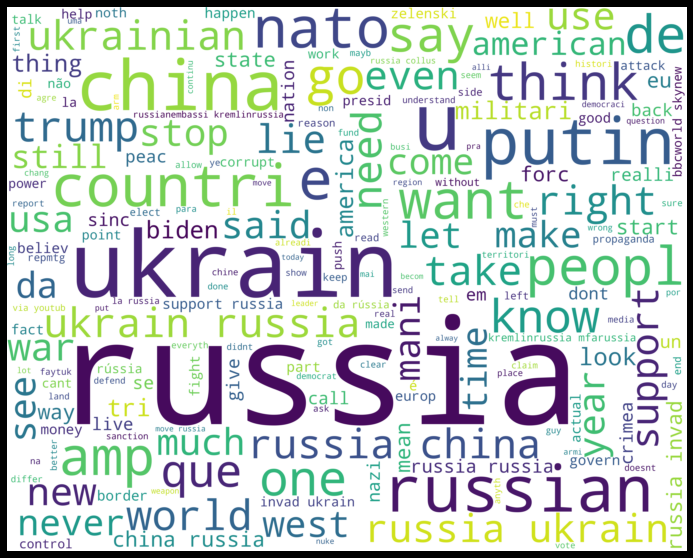

In [13]:
neutral =' '.join([i for i in data['tweet'][data['Sentiment'] == 'Neutral']])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 5000, height = 4000, stopwords=stopwords, background_color="white").generate(neutral)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
